In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import dipy.tracking.utils as dtu
import pandas as pd
import nibabel as nib
%matplotlib inline

In [2]:
ls /Users/aarya/Atlas/tracks/brainstem

CTT_L.trk.gz* DLF_R.trk.gz* MLF_L.trk.gz* ML_R.trk.gz*  STT_L.trk.gz*
CTT_R.trk.gz* LL_L.trk.gz*  MLF_R.trk.gz* RST_L.trk.gz* STT_R.trk.gz*
DLF_L.trk.gz* LL_R.trk.gz*  ML_L.trk.gz*  RST_R.trk.gz*


In [13]:
s = '/Users/aarya/Atlas/tracks/association/AF_L.trk'
s.split('/')[-1]

'AF_L.trk'

In [3]:
DATA_PATH = "/Users/aarya/Atlas/tracks/brainstem"

import os
import os.path as op
from glob import glob

In [19]:
labels = [f for f in os.listdir(DATA_PATH) if not f.startswith('.')]
len(labels)

15

In [5]:
bundle_fnames = glob(op.join(DATA_PATH, '*.trk'))
bundle_fnames[0]

'/Users/aarya/Atlas/tracks/brainstem/CTT_L.trk'

In [7]:
t1_shape = (256, 256, 150)

In [8]:
sl_sum = 0
for b_idx, bundle in enumerate(bundle_fnames):
    tgram = nib.streamlines.load(op.join(DATA_PATH, bundle))
    print(bundle, len(tgram.streamlines))
    sl_sum += len(tgram.streamlines)
sl_sum

('/Users/aarya/Atlas/tracks/brainstem/CTT_L.trk', 15)
('/Users/aarya/Atlas/tracks/brainstem/CTT_R.trk', 21)
('/Users/aarya/Atlas/tracks/brainstem/DLF_L.trk', 3)
('/Users/aarya/Atlas/tracks/brainstem/DLF_R.trk', 4)
('/Users/aarya/Atlas/tracks/brainstem/LL_L.trk', 76)
('/Users/aarya/Atlas/tracks/brainstem/LL_R.trk', 44)
('/Users/aarya/Atlas/tracks/brainstem/ML_L.trk', 103)
('/Users/aarya/Atlas/tracks/brainstem/ML_R.trk', 124)
('/Users/aarya/Atlas/tracks/brainstem/MLF_L.trk', 10)
('/Users/aarya/Atlas/tracks/brainstem/MLF_R.trk', 11)
('/Users/aarya/Atlas/tracks/brainstem/RST_L.trk', 5)
('/Users/aarya/Atlas/tracks/brainstem/RST_R.trk', 6)
('/Users/aarya/Atlas/tracks/brainstem/STT_L.trk', 195)
('/Users/aarya/Atlas/tracks/brainstem/STT_R.trk', 199)


816

In [10]:
def get_bname(f):
    return f.split('/')[-1].split('.')[0]
get_bname('/Users/aarya/Atlas/tracks/association/AF_L.trk')

'AF_L'

In [14]:
ii = 0
one_hot_arr = [0] * sl_sum
newpath = DATA_PATH+'/slines' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
for b_idx, bundle in enumerate(bundle_fnames):
    tgram = nib.streamlines.load(op.join(DATA_PATH, bundle))
    print(bundle, len(tgram.streamlines))
    for sl_idx, sl in enumerate(list(dtu.move_streamlines(tgram.streamlines, np.linalg.inv(tgram.affine)))):
            bname = get_bname(bundle)
            savepath = newpath+"/"+bname+'-'+str(sl_idx)
            if not np.mod(sl_idx, 100):
                #print("Streamline {0} at index {1}".format(sl_idx, ii))
                print("Streamline {0} at index {1} of Bundle {2} saved at path {3}".format(sl_idx, ii, bname, savepath))
            vol = np.zeros(t1_shape + (1,), dtype=bool)
            sl = np.round(sl).astype(int).T
            vol[sl[0], sl[1], sl[2]] = 1
            a1 = np.max(vol, 0).squeeze()
            for x in range(1,3):
                a1 = np.concatenate((a1, np.max(vol, x).squeeze()), axis=1)
            np.save(savepath, a1)
#            bundle_arr[bundle] = vol
#             one_hot = np.zeros(len(bundle_fnames), dtype=bool)
#             one_hot[b_idx] = 1
#             one_hot_arr[ii] = one_hot
            ii += 1

('/Users/aarya/Atlas/tracks/brainstem/CTT_L.trk', 15)
Streamline 0 at index 0 of Bundle CTT_L saved at path /Users/aarya/Atlas/tracks/brainstem/slines/CTT_L_0
('/Users/aarya/Atlas/tracks/brainstem/CTT_R.trk', 21)
Streamline 0 at index 15 of Bundle CTT_R saved at path /Users/aarya/Atlas/tracks/brainstem/slines/CTT_R_0
('/Users/aarya/Atlas/tracks/brainstem/DLF_L.trk', 3)
Streamline 0 at index 36 of Bundle DLF_L saved at path /Users/aarya/Atlas/tracks/brainstem/slines/DLF_L_0
('/Users/aarya/Atlas/tracks/brainstem/DLF_R.trk', 4)
Streamline 0 at index 39 of Bundle DLF_R saved at path /Users/aarya/Atlas/tracks/brainstem/slines/DLF_R_0
('/Users/aarya/Atlas/tracks/brainstem/LL_L.trk', 76)
Streamline 0 at index 43 of Bundle LL_L saved at path /Users/aarya/Atlas/tracks/brainstem/slines/LL_L_0
('/Users/aarya/Atlas/tracks/brainstem/LL_R.trk', 44)
Streamline 0 at index 119 of Bundle LL_R saved at path /Users/aarya/Atlas/tracks/brainstem/slines/LL_R_0
('/Users/aarya/Atlas/tracks/brainstem/ML_L.trk',

In [15]:
def get_label(path):
    x = path.split('/')[-1].split('_')[:2]
    return '_'.join(x)

In [16]:
def get_dataframe(directory):
    paths = [os.path.join(directory, f) for f in os.listdir(directory) if not f.startswith('.')]
    labels = [get_label(path) for path in paths if not path.startswith('.')]
    return pd.DataFrame({'paths': paths, 'labels': labels})
d = get_dataframe(newpath)
d.head()

,labels,paths
0,CTT_L,/Users/aarya/Atlas/tracks/brainstem/slines/CTT...
1,CTT_L,/Users/aarya/Atlas/tracks/brainstem/slines/CTT...
2,CTT_L,/Users/aarya/Atlas/tracks/brainstem/slines/CTT...
3,CTT_L,/Users/aarya/Atlas/tracks/brainstem/slines/CTT...
4,CTT_L,/Users/aarya/Atlas/tracks/brainstem/slines/CTT...


(256, 556)

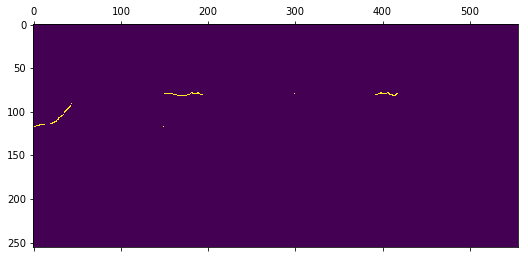

In [18]:
foo = np.load(d['paths'][0])
plt.matshow(foo)
foo.shape